# Logistic regression for a binary classification with a regularization

In [113]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from matplotlib import cm

### 1. Training Data

In [114]:
data = pd.read_csv("training.txt", names=['x','y','label'])

In [115]:
data

,x,y,label
0,0.76090,0.116706,0.0
1,0.99777,0.082345,0.0
2,1.02459,0.291094,0.0
3,1.07755,0.091764,0.0
4,0.91385,0.054629,0.0
...,...,...,...
195,1.00000,1.000000,1.0
196,1.00000,1.000000,1.0
197,1.00000,1.000000,1.0
198,1.00000,1.000000,1.0


### 2. Testing Data

In [116]:
test_data = pd.read_csv("testing.txt", names=['x','y','label'])

In [117]:
test_data

,x,y,label
0,1.00726,0.268272,0.0
1,0.87378,0.204539,0.0
2,0.98254,0.245526,0.0
3,1.05977,0.265070,0.0
4,0.74250,0.228713,0.0
...,...,...,...
195,1.00000,1.000000,1.0
196,1.00000,1.000000,1.0
197,1.00000,1.000000,1.0
198,1.00000,1.000000,1.0


- 라벨값을 저장하고 $g(x,y,\theta)$ 함수를 정의하겠습니다.

In [119]:
data_1 = data[data['label'] == 1]
dataX_1 = data_1['x']
dataY_1 = data_1['y']

data_0 = data[data['label'] == 0]
dataX_0 = data_0['x']
dataY_0 = data_0['y']

test_data_1 = test_data[test_data['label'] == 1]
test_dataX_1 = test_data_1['x']
test_dataY_1 = test_data_1['y']

test_data_0 = test_data[test_data['label'] == 0]
test_dataX_0 = test_data_0['x']
test_dataY_0 = test_data_0['y']

In [120]:
label = data['label']
test_label = test_data['label']

In [379]:
train_new_data = pd.DataFrame()
test_new_data = pd.DataFrame()

## training data
for i in range(10):
    for j in range(10):
        name = "x" + str(i) + "y" + str(j)
        train_new_data[name] = data['x'] ** i * data['y'] ** j

        
## testing data
for i in range(10):
    for j in range(10):
        name = "x" + str(i) + "y" + str(j)
        test_new_data[name] = test_data['x'] ** i * test_data['y'] ** j

- $x,y$를 순서대로 곱하여 다음과 같은 데이터를 만들었습니다. $x^0y^0$은 상수항이기에 데이터에서 제외하고 따로 관리하여 계산하겠습니다.

In [380]:
train_new_data

,x0y0,x0y1,x0y2,x0y3,x0y4,x0y5,x0y6,x0y7,x0y8,x0y9,...,x9y0,x9y1,x9y2,x9y3,x9y4,x9y5,x9y6,x9y7,x9y8,x9y9
0,1.0,0.116706,0.013620,0.001590,0.000186,2.165069e-05,2.526773e-06,2.948903e-07,3.441556e-08,4.016514e-09,...,0.085496,0.009978,0.001164,0.000136,0.000016,1.851058e-06,2.160302e-07,2.521209e-08,2.942410e-09,3.433978e-10
1,1.0,0.082345,0.006781,0.000558,0.000046,3.785956e-06,3.117530e-07,2.567118e-08,2.113883e-09,1.740668e-10,...,0.980108,0.080707,0.006646,0.000547,0.000045,3.710646e-06,3.055516e-07,2.516053e-08,2.071833e-09,1.706043e-10
2,1.0,0.291094,0.084736,0.024666,0.007180,2.090092e-03,6.084129e-04,1.771053e-04,5.155426e-05,1.500713e-05,...,1.244374,0.362230,0.105443,0.030694,0.008935,2.600856e-03,7.570933e-04,2.203852e-04,6.415279e-05,1.867449e-05
3,1.0,0.091764,0.008421,0.000773,0.000071,6.506846e-06,5.970966e-07,5.479219e-08,5.027971e-09,4.613886e-10,...,1.958560,0.179726,0.016492,0.001513,0.000139,1.274405e-05,1.169450e-06,1.073138e-07,9.847584e-09,9.036573e-10
4,1.0,0.054629,0.002984,0.000163,0.000009,4.865555e-07,2.658024e-08,1.452063e-09,7.932531e-11,4.333495e-12,...,0.444503,0.024283,0.001327,0.000072,0.000004,2.162751e-07,1.181498e-08,6.454455e-10,3.526030e-11,1.926249e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
196,1.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
197,1.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
198,1.0,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [381]:
test_new_data

,x0y0,x0y1,x0y2,x0y3,x0y4,x0y5,x0y6,x0y7,x0y8,x0y9,...,x9y0,x9y1,x9y2,x9y3,x9y4,x9y5,x9y6,x9y7,x9y8,x9y9
0,1.0,0.268272,0.071970,0.019308,0.005180,0.001390,0.000373,0.000100,0.000027,7.197514e-06,...,1.067270,0.286319,0.076811,0.020606,0.005528,0.001483,0.000398,0.000107,2.863393e-05,7.681690e-06
1,1.0,0.204539,0.041836,0.008557,0.001750,0.000358,0.000073,0.000015,0.000003,6.265953e-07,...,0.296906,0.060729,0.012421,0.002541,0.000520,0.000106,0.000022,0.000004,9.095565e-07,1.860399e-07
2,1.0,0.245526,0.060283,0.014801,0.003634,0.000892,0.000219,0.000054,0.000013,3.242486e-06,...,0.853399,0.209532,0.051445,0.012631,0.003101,0.000761,0.000187,0.000046,1.127023e-05,2.767134e-06
3,1.0,0.265070,0.070262,0.018624,0.004937,0.001309,0.000347,0.000092,0.000024,6.460147e-06,...,1.686183,0.446956,0.118475,0.031404,0.008324,0.002207,0.000585,0.000155,4.109479e-05,1.089299e-05
4,1.0,0.228713,0.052310,0.011964,0.002736,0.000626,0.000143,0.000033,0.000007,1.712468e-06,...,0.068591,0.015688,0.003588,0.000821,0.000188,0.000043,0.000010,0.000002,5.135694e-07,1.174601e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
196,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
197,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00
198,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00


### 3. Logistic regression with a high dimensional feature function

- 필요 함수들을 선언하겠습니다.

In [382]:
def logistic(x):
    return 1 / (1 + math.e ** -x)

In [383]:
def check_accuracy(result):
    match = 0
    for i in range(len(result)):
        if result[i] < 0.5 and label[i] == 0:
            match += 1
        if result[i] >= 0.5 and label[i] == 1:
            match += 1
    return match/len(label)

In [443]:
def function_f(x, y, k):
    return (x ** int(k/10)) * (y ** int(k%10))

### 4. Hyper-parameter

In [472]:
ephochs = 10
m = len(label)
learning_rate = 0.1
train_new_data_array = np.array(train_new_data)

lamda_list = [0.00001, 0.0001, 0.001, 0.01, 0.1]
training_loss_list = []
testing_loss_list = []
train_accuracy_list = []
test_accuracy_list = []
coef_list = []

### 5. Training

In [473]:
for idx, lamda in enumerate(lamda_list):
    training_loss = []
    testing_loss = []
    train_accuracy = []
    test_accuracy = []
    coef = np.zeros(100)

    for i in range(ephochs):  
        if i % 100 == 0:
            print(str(i) + " times running..")
        h = np.array(logistic(train_new_data.dot(coef)))
        test_h = np.array(logistic(test_new_data.dot(coef)))
        
        train_loss = - (1/m) * np.sum(label * np.log(h) + (1 - label) * np.log(1 - h)) + lamda * (t0 ** 2 + np.sum(coef ** 2))
        test_loss = - (1/m) * np.sum(test_label * np.log(test_h) + (1 - test_label) * np.log(1 - test_h)) + lamda * (t0 ** 2 + np.sum(coef ** 2))
        
        training_loss.append(train_loss)
        testing_loss.append(test_loss)
        train_accuracy.append(check_accuracy(h))   
        test_accuracy.append(check_accuracy(test_h))
        for i in range(len(coef)):
            coef[i] = coef[i] - learning_rate * (np.sum((h - label) * train_new_data_array[:,i] / m) + lamda * coef[i])
    
    ## 결과 저장
    coef_list.append(coef)
    testing_loss_list.append(testing_loss)
    training_loss_list.append(training_loss)
    train_accuracy_list.append(train_accuracy[-1])
    test_accuracy_list.append(test_accuracy[-1])

0 times running..


C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


0 times running..
0 times running..
0 times running..
0 times running..


# [Output]

### 1. Plot the training data

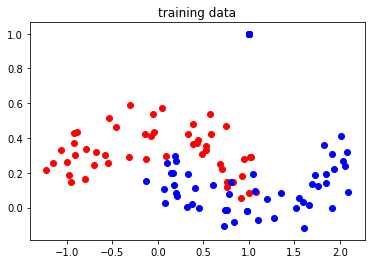

In [474]:
plt.scatter(dataX_0, dataY_0, color ='r')
plt.scatter(dataX_1, dataY_1, color ='b')
plt.title('training data')
plt.show()

### 2. Plot the testing data

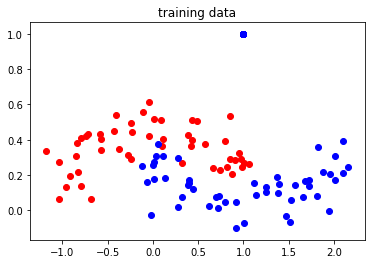

In [475]:
plt.scatter(test_dataX_0, test_dataY_0, color ='r')
plt.scatter(test_dataX_1, test_dataY_1, color ='b')
plt.title('training data')
plt.show()

### 3. Plot the learning curve with λ=0.00001

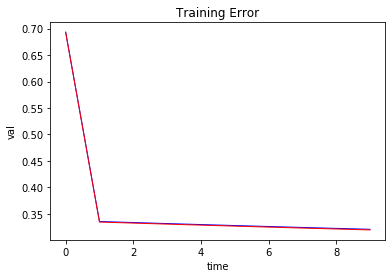

In [476]:
plt.plot([i for i in range(len(training_loss_list[0]))], training_loss_list[0], c = 'b', linewidth=1)
plt.plot([i for i in range(len(testing_loss_list[0]))], testing_loss_list[0], c = 'r', linewidth=1)
plt.title('Training Error')
plt.xlabel('time')
plt.ylabel('val')
plt.show()

### 4. Plot the learning curve with λ=0.0001

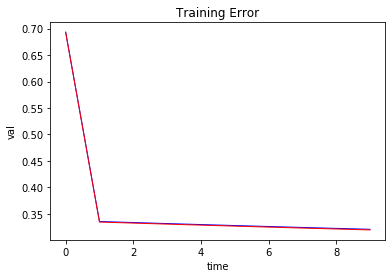

In [477]:
plt.plot([i for i in range(len(training_loss_list[1]))], training_loss_list[0], c = 'b', linewidth=1)
plt.plot([i for i in range(len(testing_loss_list[1]))], testing_loss_list[0], c = 'r', linewidth=1)
plt.title('Training Error')
plt.xlabel('time')
plt.ylabel('val')
plt.show()

### 5. Plot the learning curve with λ=0.001

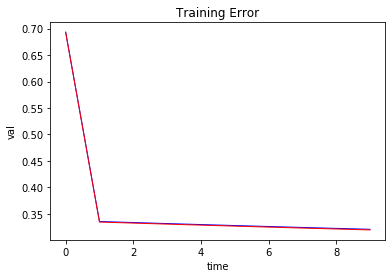

In [478]:
plt.plot([i for i in range(len(training_loss_list[2]))], training_loss_list[0], c = 'b', linewidth=1)
plt.plot([i for i in range(len(testing_loss_list[2]))], testing_loss_list[0], c = 'r', linewidth=1)
plt.title('Training Error')
plt.xlabel('time')
plt.ylabel('val')
plt.show()

### 6. Plot the learning curve with λ=0.01

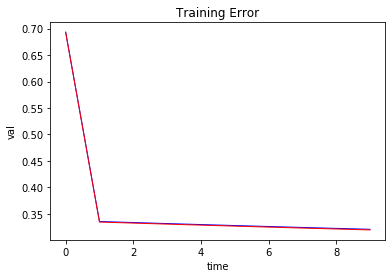

In [479]:
plt.plot([i for i in range(len(training_loss_list[3]))], training_loss_list[0], c = 'b', linewidth=1)
plt.plot([i for i in range(len(testing_loss_list[3]))], testing_loss_list[0], c = 'r', linewidth=1)
plt.title('Training Error')
plt.xlabel('time')
plt.ylabel('val')
plt.show()

### 7. Plot the learning curve with λ=0.1

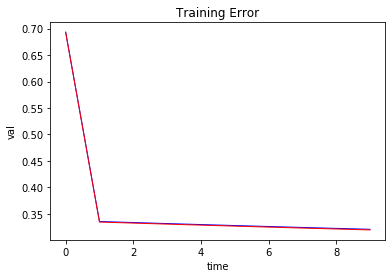

In [480]:
plt.plot([i for i in range(len(training_loss_list[4]))], training_loss_list[0], c = 'b', linewidth=1)
plt.plot([i for i in range(len(testing_loss_list[4]))], testing_loss_list[0], c = 'r', linewidth=1)
plt.title('Training Error')
plt.xlabel('time')
plt.ylabel('val')
plt.show()

### 8. Plot the probability map of the obtained classifier with λ=0.00001

In [ ]:
x1_coordinate = np.linspace(-2, 3, 100)
x2_coordinate = np.linspace(-1 , 1.1, 100)

xx1, xx2 = np.meshgrid(x1_coordinate, x2_coordinate) # create meshgrid
X2 = np.zeros((len(xx1), len(xx2)))

for i in range(len(x1_coordinate)):
    for j in range(len(x2_coordinate)):
        sum = 0
        for k in range(len(coef_list[0])):
            sum += coef_list[0][k] * function_f(x1_coordinate[i], x2_coordinate[j], k)
        X2[i,j] = logistic(sum)

# plot
plt.figure(4,figsize=(12,10))
fig = plt.figure(4,figsize=(12,10))
ax = plt.contourf(xx1, xx2, np.transpose(X2), cmap=cm.coolwarm, alpha=0.5, levels = np.arange(0, 1.01, 0.01))
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter(dataX_0, dataY_0 , s=100, c='r', marker='.', label='class=0') 
plt.scatter(dataX_1, dataY_1, s=100, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, np.transpose(X2), [0.5], linewidths=2, colors='k') 
# plt.legend()
plt.title('Decision boundary')
plt.show()

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


### 9. Plot the probability map of the obtained classifier with λ=0.0001

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


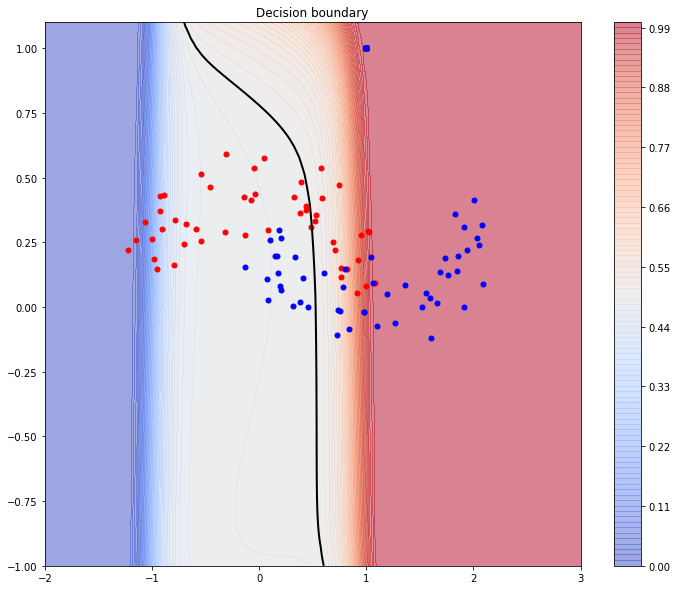

In [454]:
x1_coordinate = np.linspace(-2, 3, 100)
x2_coordinate = np.linspace(-1 , 1.1, 100)

xx1, xx2 = np.meshgrid(x1_coordinate, x2_coordinate) # create meshgrid
X2 = np.zeros((len(xx1), len(xx2)))

for i in range(len(x1_coordinate)):
    for j in range(len(x2_coordinate)):
        sum = 0
        for k in range(len(coef_list[1])):
            sum += coef_list[1][k] * function_f(x1_coordinate[i], x2_coordinate[j], k)
        X2[i,j] = logistic(sum)

# plot
plt.figure(4,figsize=(12,10))
fig = plt.figure(4,figsize=(12,10))
ax = plt.contourf(xx1, xx2, np.transpose(X2), cmap=cm.coolwarm, alpha=0.5, levels = np.arange(0, 1.01, 0.01))
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter(dataX_0, dataY_0 , s=100, c='r', marker='.', label='class=0') 
plt.scatter(dataX_1, dataY_1, s=100, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, np.transpose(X2), [0.5], linewidths=2, colors='k') 
# plt.legend()
plt.title('Decision boundary')
plt.show()

### 10. Plot the probability map of the obtained classifier with λ=0.001

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


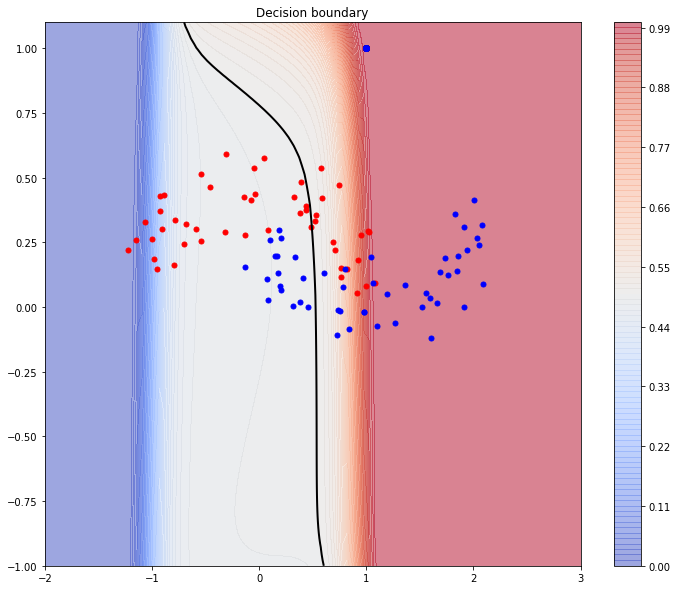

In [455]:
x1_coordinate = np.linspace(-2, 3, 100)
x2_coordinate = np.linspace(-1 , 1.1, 100)

xx1, xx2 = np.meshgrid(x1_coordinate, x2_coordinate) # create meshgrid
X2 = np.zeros((len(xx1), len(xx2)))

for i in range(len(x1_coordinate)):
    for j in range(len(x2_coordinate)):
        sum = 0
        for k in range(len(coef_list[2])):
            sum += coef_list[2][k] * function_f(x1_coordinate[i], x2_coordinate[j], k)
        X2[i,j] = logistic(sum)

# plot
plt.figure(4,figsize=(12,10))
fig = plt.figure(4,figsize=(12,10))
ax = plt.contourf(xx1, xx2, np.transpose(X2), cmap=cm.coolwarm, alpha=0.5, levels = np.arange(0, 1.01, 0.01))
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter(dataX_0, dataY_0 , s=100, c='r', marker='.', label='class=0') 
plt.scatter(dataX_1, dataY_1, s=100, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, np.transpose(X2), [0.5], linewidths=2, colors='k') 
# plt.legend()
plt.title('Decision boundary')
plt.show()

### 11. Plot the probability map of the obtained classifier with λ=0.01

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


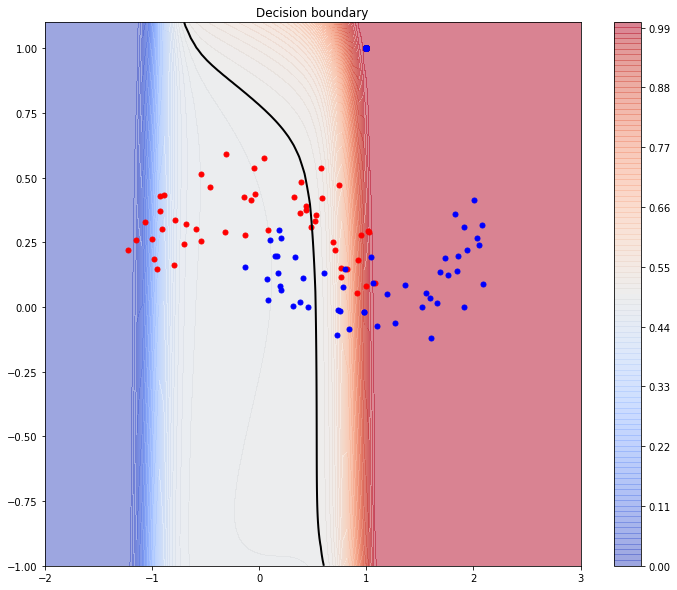

In [456]:
x1_coordinate = np.linspace(-2, 3, 100)
x2_coordinate = np.linspace(-1 , 1.1, 100)

xx1, xx2 = np.meshgrid(x1_coordinate, x2_coordinate) # create meshgrid
X2 = np.zeros((len(xx1), len(xx2)))

for i in range(len(x1_coordinate)):
    for j in range(len(x2_coordinate)):
        sum = 0
        for k in range(len(coef_list[3])):
            sum += coef_list[3][k] * function_f(x1_coordinate[i], x2_coordinate[j], k)
        X2[i,j] = logistic(sum)

# plot
plt.figure(4,figsize=(12,10))
fig = plt.figure(4,figsize=(12,10))
ax = plt.contourf(xx1, xx2, np.transpose(X2), cmap=cm.coolwarm, alpha=0.5, levels = np.arange(0, 1.01, 0.01))
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter(dataX_0, dataY_0 , s=100, c='r', marker='.', label='class=0') 
plt.scatter(dataX_1, dataY_1, s=100, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, np.transpose(X2), [0.5], linewidths=2, colors='k') 
# plt.legend()
plt.title('Decision boundary')
plt.show()

### 12. Plot the probability map of the obtained classifier with λ=0.1

C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  


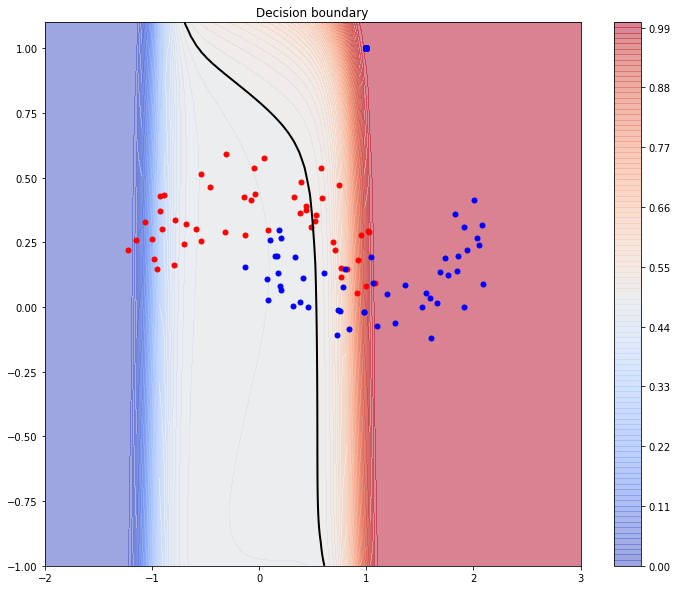

In [458]:
x1_coordinate = np.linspace(-2, 3, 100)
x2_coordinate = np.linspace(-1 , 1.1, 100)

xx1, xx2 = np.meshgrid(x1_coordinate, x2_coordinate) # create meshgrid
X2 = np.zeros((len(xx1), len(xx2)))

for i in range(len(x1_coordinate)):
    for j in range(len(x2_coordinate)):
        sum = 0
        for k in range(len(coef_list[4])):
            sum += coef_list[4][k] * function_f(x1_coordinate[i], x2_coordinate[j], k)
        X2[i,j] = logistic(sum)

# plot
plt.figure(4,figsize=(12,10))
fig = plt.figure(4,figsize=(12,10))
ax = plt.contourf(xx1, xx2, np.transpose(X2), cmap=cm.coolwarm, alpha=0.5, levels = np.arange(0, 1.01, 0.01))
cbar = plt.colorbar( )
cbar.update_ticks()

plt.scatter(dataX_0, dataY_0 , s=100, c='r', marker='.', label='class=0') 
plt.scatter(dataX_1, dataY_1, s=100, c='b', marker='.', label='class=1')
plt.contour(xx1, xx2, np.transpose(X2), [0.5], linewidths=2, colors='k') 
# plt.legend()
plt.title('Decision boundary')
plt.show()

### 13 Print the final training accuracy with the given regularization parameters

In [470]:
train_accuracy_list

[0.82, 0.82, 0.83, 0.82, 0.83, 0.82, 0.83, 0.82, 0.83, 0.83, 0.835]

### 14 Print the final testing accuracy with the given regularization parameters

In [471]:
test_accuracy_list

NameError: name 'test_accuracy_list' is not defined

## 2. Plot the training error with varying regularization parameters

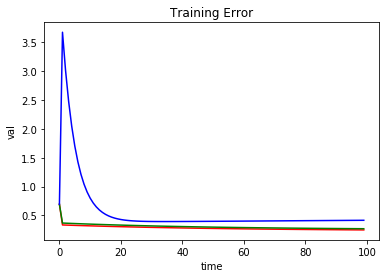

In [24]:
color = ['r','g','b']
for idx, loss in enumerate(Loss_list):
    plt.plot([i for i in range(len(loss))], loss, c = color[idx])
plt.title('Training Error')
plt.xlabel('time')
plt.ylabel('val')
plt.show()

## 3. Display the values of the chosen regularization parameters

In [25]:
print('\033[31m' +'over-fitting ' + str(lamda_list[0]) + '\033[0m') 
print('\033[32m' +'just-right '+ str(lamda_list[1]) + '\033[0m') 
print('\033[34m' +'under-fitting ' + str(lamda_list[2]) + '\033[0m') 


over-fitting 0.0001
just-right 0.01
under-fitting 1


## 4. Plot the training accuracy with varying regularization parameters

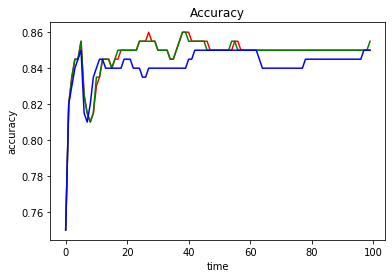

In [26]:
color = ['r','g','b']
for idx, ac in enumerate(accuracy_list):
    plt.plot([i for i in range(len(ac))], ac, c = color[idx])
plt.title('Accuracy')
plt.xlabel('time')
plt.ylabel('accuracy')
plt.show()

## 5. Display the final training accuracy with varying regularization parameters

In [27]:
print('\033[31m' + "over-fitting " +str(accuracy_list[0][-1]) + '\033[0m') 
print('\033[32m' +'just-right '+ str(accuracy_list[1][-1]) + '\033[0m') 
print('\033[34m' +'under-fitting '+  str(accuracy_list[2][-1]) + '\033[0m') 

over-fitting 0.85
just-right 0.855
under-fitting 0.85


## 6. Plot the optimal classifier with varying regularization parameters superimposed on the training data



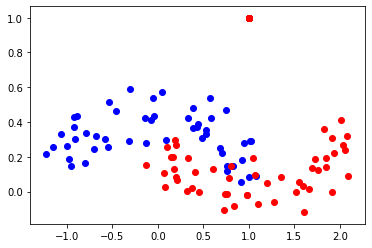

In [28]:
color = ['r','g','b']
for idx, r in enumerate(result):    
    plt.contour(r[0],r[1],r[2],[0] ,colors=color[idx])

plt.scatter(dataX_0, dataY_0, color ='b')
plt.scatter(dataX_1, dataY_1, color ='r')
plt.show()